Terry Ho

# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?
> * **Always-on**. Can you keep collecting data over time?
> * **Non-reactive**. Is the dataset non-reactive?
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 
> * **Inaccessible**. Is the data accessible? 
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
> * **Dirty**. What aspect may make this dataset *dirty*?
> * **Sensitive**. Is there any sensitive information in the data?



> * **Big**: How large is this data (approximately)? Could you collect the same amount of information via surveys?
>> * Around 14k. You can collect this many through surveys through an online questionnaire. 
> * **Always-on**. Can you keep collecting data over time?
>> * Yes, data can be collected before, during, and after the peak of the GME frenzy.
> * **Non-reactive**. Is the dataset non-reactive?
>> * Yes. Most of these people commenting and making posts say whatever they want due to the anonymity of being behind a screen.
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 
>> *  It does not. In order to get a full sense of what is happening, we need access to all the numbers and graphs.
> * **Inaccessible**. Is the data accessible? 
>> * The data is accessible. Anyone on the internet can find submissions containing the word GME on a public subreddit.
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
>> * I do not think that this dataset is representative as the data is completely from reddit users. Analyzing this dataset would not give us events only specific to GME as many users on reddit like to spread false information or talk about irrelevant information.
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
>> * Yes, there is a source of population drift during the period observed. Initially, a lot of the people in the dataset were limited to only people who owned shares or interested in the stock. However, during the period of the stocks going up, a lot of outsiders became included in the dataset.
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
>> * Yes, the dataset is algorithmically confounded. Reddit puts popular posts on /hot or /popular, allowing people who don't follow the subreddit of /wallstreetbets to see posts about GME, which can garner the attention of those not into stocks.
> * **Dirty**. What aspect may make this dataset *dirty*?
>> * Spam bots might make this dataset dirty. Because GME was a hot topic during January 2021, a lot of bots infiltrated the subreddit and wrote repetitive messages or unrelated messages to GME. Some also spammed messages to distract people from the topic itself.
> * **Sensitive**. Is there any sensitive information in the data?
>> * There could be sensitive data in the dataset. People may share their personal stories on reddit regarding their stock journey. Some people also share what they bought and details about their stock accounts. While they are sharing this in a public space, some details might be more personal to them and a few others. 


# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

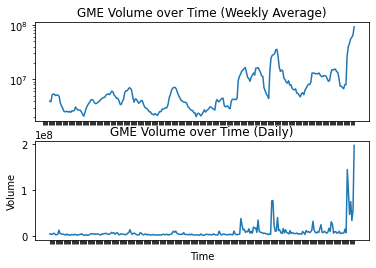

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('GME.csv')
Volume=data.Volume
Time=data.Date
  
fig, (ax2, ax1) = plt.subplots(2)

ax1.plot(Time, Volume)
ax1.set_title('GME Volume over Time (Daily)')
ax1.set_xticklabels([])

Volume_avg=Volume.rolling(7).mean()
  
ax2.plot(Time, Volume_avg)
ax2.set_title('GME Volume over Time (Weekly Average)')
ax2.set_xticklabels([])
ax2.set_yscale('log')

plt.xlabel('Time')
plt.ylabel('Volume')

fig.show()

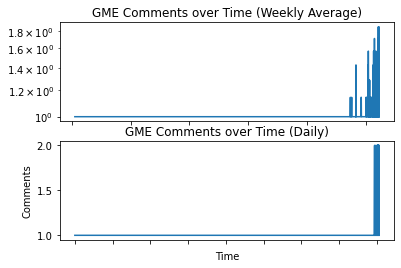

In [ ]:
data=pd.read_csv('GME_comments.csv')
Date=data.created_utc
type(Date)

num_count = [1] * len(Date)
date_list = [1] * len(Date)

for i in range(0,len(Date)-1):
    date_list[i]=Date[i]
    # print(date_list[i])
    if(Date[i] == Date[i+1]):
      num_count[i]+=1
      num_count[i+1]=0
      date_list[i+1]=0

while 0 in num_count: 
  index = num_count.index(0)
  del date_list[index]
  num_count.remove(0)

count_list_s = pd.Series(num_count)
date_list_s = pd.Series(date_list)

fig, (ax2, ax1) = plt.subplots(2)

ax1.plot(date_list_s, count_list_s)
ax1.set_title('GME Comments over Time (Daily)')
ax1.set_xticklabels([])

count_avg=count_list_s.rolling(7).mean()
time_avg=date_list_s.rolling(7).mean()

ax2.plot(time_avg, count_avg)
ax2.set_title('GME Comments over Time (Weekly Average)')
ax2.set_xticklabels([])
ax2.set_yscale('log')

plt.xlabel('Time')
plt.ylabel('Comments')

fig.show()

3. Having these graphs on a log scale allows us to see this large dataset in more detail. Since the values of the volume and comments are in such a large range, the only thing we can see is a "straight" line for most of the graph until 2021. However, log scale is able to show more detail for 2020 as well. The advantage of rolling window is that it updates the average each new row. This places less emphasis on the really old values.

4. The graphs displaying the weekly average uses the rolling window method and logarithmic scale. As shown in the weekly Volume over Time graph, we can more clearly see the volume for each week. In the daily graph, most of 2020 is hard to see just by looking. It is somewhat similar for the comments graphs. However, even in the weekly graph, most of 2020 have no comments on the subreddit.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*


In [17]:
import pandas as pd
import numpy as np

gme=pd.read_csv('GME.csv')

# comments = comments.query("created_utc < 1609372800")
# comments = comments[comments.author != '[deleted]']
# submissions = submissions.query("created_utc < 1609372800")
# submissions = submissions[submissions.author != '[deleted]']

# comment_id = comments.id

comments=pd.read_csv('GME_comments.csv')
# comments = comments.query("created_utc < 1609372800")
# comments = comments[comments.author != '[deleted]']

# submissions=pd.read_csv('GME_submissions.csv')
# submissions = submissions.query("created_utc < 1609372800")
# submissions = submissions[submissions.author != '[deleted]']

# def sum_keys(d):
#     return (len(d) + sum(sum_keys(v) for v in d.itervalues()))
# for key, value in comments.items():
#     #print value
#     print(key, len(filter(bool, value)))

comment_id = comments.id
comment_author = comments.author
comment_count = comments.groupby(['created_utc']).count()


close = gme.Close
open = gme.Open
t = 1
daily_return = np.log(close[t]/close[t-1])

# daily_comments = np.log(comment_count(t)/comment_count(t-1))

The activity on wallstreetbets is related to the GME stock. Whenever there was more activity, GME stock was at its peak.

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

1. Königsberg Problem \\
According to Euler's proof, the problem is only solvable if all vertices in the graph had an even number of edges connecting to it. Using this information, only **C** is solvable. All the vertices in C have an even degree.

Adjacency Matrix for A

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Adjacency Matrix for B

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Adjacency List for A

1 2 3 4 6
2 3 4
3 6
4
5
6

Adjacency List for B

1 2 3 4 6
2 3 4
3 6
4
6
5

Switching 5 and 6


Adjacency Matrix for A

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Adjacency Matrix for B

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Adjacency List for A

1 2 3 4 5
2 3 4
3 5
4
6
5


Adjacency List for B
1 2 3 4 5
2 3 4
3 5
4
5
6


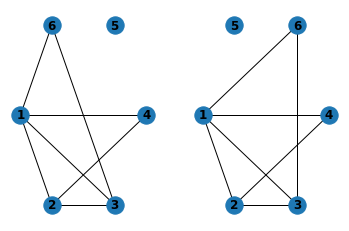

In [11]:
#2. Graph Representation
import networkx as nx
a = nx.Graph({1: (2,3,4,6), 2: (1,3,4), 3: (1,2,6), 4: (1,2), 5:(), 6:(1,3)})
cood = [(1,2,1),(2,3,1),(2,4,1),(3,2,1),(3,1,1),(4,1,1),(6,1,1),(6,3,1)]
b = nx.Graph()
b.add_weighted_edges_from(cood)
b.add_node(5)


import matplotlib.pyplot as plt

ax1 = plt.subplot(121)
nx.draw_shell(a, with_labels=True, font_weight='bold')
ax2 = plt.subplot(122)
nx.draw_shell(b, with_labels=True, font_weight='bold')


print('Adjacency Matrix for A\n')
mat1 = nx.adjacency_matrix(a)
print(mat1.todense())

print('\nAdjacency Matrix for B\n')
mat2 = nx.adjacency_matrix(b)
print(mat2.todense())

print('\nAdjacency List for A\n')
for line in nx.generate_adjlist(a):
  print(line)

print('\nAdjacency List for B\n')
for line in nx.generate_adjlist(b):
  print(line)

#Switching 5 with 6

a2 = nx.Graph({1: (2,3,4,5), 2: (1,3,4), 3: (1,2,5), 4: (1,2), 6:(), 5:(1,3)})
cood = [(1,2,1),(2,3,1),(2,4,1),(3,2,1),(3,1,1),(4,1,1),(5,1,1),(5,3,1)]
b2 = nx.Graph()
b2.add_weighted_edges_from(cood)
b2.add_node(6)

print('\nSwitching 5 and 6\n')
print('\nAdjacency Matrix for A\n')
mat1 = nx.adjacency_matrix(a2)
print(mat1.todense())

print('\nAdjacency Matrix for B\n')
mat2 = nx.adjacency_matrix(b2)
print(mat2.todense())

print('\nAdjacency List for A\n')
for line in nx.generate_adjlist(a2):
  print(line)

print('\n\nAdjacency List for B')
for line in nx.generate_adjlist(b2):
  print(line)

*   Clustering coefficient of (a)
  * Ci = 2Li/(Ki*(Ki-1))
  * C1 = (2*3)/(4*3) = 6/12 = 1/2
  * C2 = (2*2)/(3*2) = 4/6 = 2/3
  * C3 = (2*2)/(3*2) = 4/6 = 2/3
  * C4 = (2*1)/(2*1) = 2/2 = 1
  * C5 = 0
  * C6 = (2*1)/(2*1) = 4/4 = 1
  * **Average CC = 23/36 = 0.639**
*   One can infer whether a network is undirected or directed by the symmetry of the matrix. If the graph is undirected, the graph is symmetrical. However, it would be much harder to infer this from a linked list as you would have to traverse through many more items. One can also immediately tell whether there is a direct edge between two nodes. It would be much harder in an adjacency list.
*  How many paths of length 3 exist(start 1, end 3)?
  * a: (1>4>2>3), (1>2>1>3), (1>6>1>3), (1>4>1>3), (1,3>1,3), (1,3>2>3), (1,3,6,3) = **7 paths**
  * b: **0 paths**


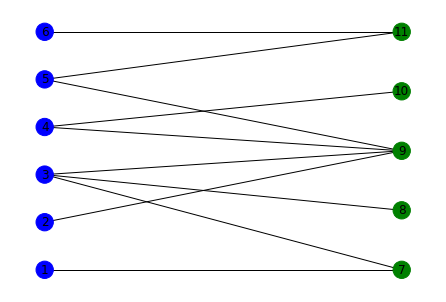

Adjacency Matrix for C

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]

Adjacency List for C

1 7
2 9
3 7 8 9
4 9 10
5 9 11
6 11
7
8
9
10
11

Node Degrees

[1, 1, 3, 2, 2, 1, 2, 1, 4, 1, 2]

Node Degree Average for Purple

1.6666666666666667

Node Degree Average for Green

2.0


In [12]:
#2.5 Bipartite Networks
import networkx as nx

C = nx.Graph()
purple = [1,2,3,4,5,6]
C.add_nodes_from([1,2,3,4,5,6], bipartite=0)
C.add_nodes_from([7,8,9,10,11], bipartite=1)
C.add_edges_from([(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11),
                  (7,1),(7,3),(8,3),(9,3),(9,4),(9,5),(10,4),(11,5),(11,6)])

top = nx.bipartite.sets(C)[0]
pos = nx.bipartite_layout(C, top)
nx.draw(C, pos=pos, with_labels=True, node_color=['blue','blue','blue','blue','blue','blue','green','green','green','green','green'])
plt.show()


print('Adjacency Matrix for C\n')
mat3 = nx.adjacency_matrix(C)
print(mat3.todense())

print('\nAdjacency List for C\n')
for line in nx.generate_adjlist(C):
  print(line)

print('\nNode Degrees\n')
print([val for (node,val) in C.degree()])
print('\nNode Degree Average for Purple\n')
print((1+1+3+2+2+1)/6)
print('\nNode Degree Average for Green\n')
print((2+1+4+1+2)/5)

# print('Adjacency Matrix for C (purple)\n')
# mat3 = nx.adjacency_matrix(C)
# print(mat3.todense())

# print('Adjacency Matrix for C (green)\n')
# mat3 = nx.adjacency_matrix(C)
# print(mat3.todense())

It is a block-diagonal matrix since it is a square matrix with 11x11 elements.

# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula). \\
* <k> = 2(L) / N = p(N-1)
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [18]:
import pandas as pd
import networkx as nx
#import itertools 
comments=pd.read_csv('GME_comments.csv')
submissions=pd.read_csv('GME_submissions.csv')
comments = comments.query("created_utc < 1609372800")
comments = comments[comments.author != '[deleted]']
submissions = submissions.query("created_utc < 1609372800")
submissions = submissions[submissions.author != '[deleted]']

comment_id = comments.id
comment_author = comments.author
parent_id = comments.parent_id
submission_id = submissions.id
submission_author = submissions.author

comment_authors = dict(zip(comment_id, comment_author))
parent = dict(zip(comment_id , parent_id))
submission_authors = dict(zip(submission_id, submission_author))

def comment_to_author(id):
  author = ''
  parent_found = parent[id]
  parent_found1 = parent_found
  if('t1_'==parent_found[:3]):
    author = comment_authors[id]
  if('t3_'==parent_found[:3]):
    author = submission_author.get(id)
  return author

parent_author = [''] * len(comments)

x = 0
for i in comment_id:
  parent_author[x] = comment_to_author(i)
  x += 1

comments['parent_author'] = parent_author

comments= comments.groupby(['author', 'parent_author']).count()

# print(comments)
# G = nx.Graph()

# G = nx.from_pandas_edgelist(comments, edge_attr=True)

# G.add_nodes_from(comments.groupby(['author','parent_author']).count())

# print(G.edges())

# H=nx.from_pandas_edgelist(comments,edge_attr=True)

# G=nx.Graph()
# G.add_weighted_edges_from(comments)

# gnm_random_graph

In [ ]:
# from psaw import PushshiftAPI
# import pandas as pd

# #r = praw.Reddit(...)
# api = PushshiftAPI()

# submissions = list(api.search_submissions(after=1577833200,
#                             before=1611615599,
#                             subreddit='wallstreetbets',
#                             q='GME|Gamestop',
#                             ))

# df = pd.DataFrame([submissions])

# df.to_csv('ex1.csv', index=False, encoding='utf-8') 

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


Exception: ignored